### 1. 이미지 합성하기
- 비트연산

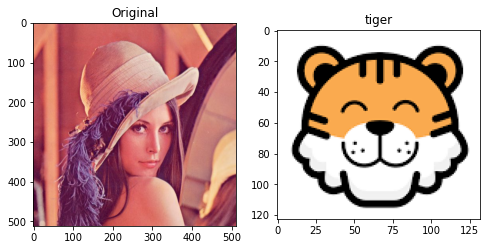

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./images/tiger.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,5))

# row, columns, index
plt.subplot(1,2,1) # plt에서 여러개 출력하는 방법
plt.title('Original')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('tiger')
plt.imshow(img2)
plt.show()

In [38]:
img2.shape

(123, 132, 3)

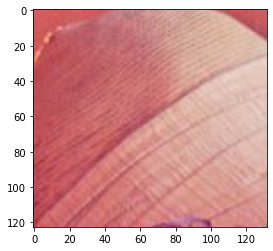

In [16]:
# tiger에 해당하는 동일한 크기의 원본 이미지 잘라내기

rows, cols, channels = img2.shape
roi = img[50:rows+50, 150:cols+150]

plt.imshow(roi)

- cv2.bitwise_not(mask)

In [28]:
# 원본이미지의 마스크 패턴 만들기
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, mask_b = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)

# 흰색부분이 마스크가 되도록하기 위해 반전연산
mask_b_inv = cv2.bitwise_not(mask_b)

cv2.imshow('kk',img2gray)

cv2.imshow('mask', mask_b)
cv2.imshow('mask_inv', mask_b_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.bitwise_and(src1, src2, mask=) : mask의 값이 아닌 부분만 src1과 src2를 AND연산
    - mask는 흑백 이미지여야 함
    - mask값이 0인 부분(검정)은 연산되지 않고 검정색 그대로 놓여진다.

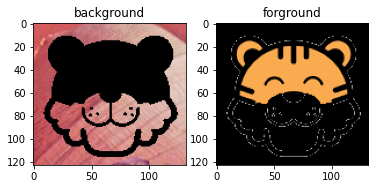

In [34]:
# 원본 roi 이미지에서 호랑이 그림이 들어갈 부분 만들기
img_bg = cv2.bitwise_and(roi, roi, mask=mask_b)

img_fg = cv2.bitwise_and(img2, img2, mask=mask_b_inv)


plt.subplot(1,2,1)
plt.title('background')
plt.imshow(img_bg)

plt.subplot(1,2,2)
plt.title('forground')
plt.imshow(img_fg)
plt.show()

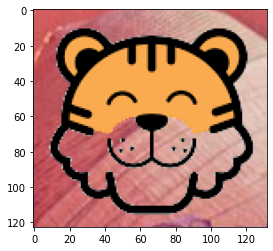

In [36]:
# background 이미지에 forground 이미지 더하기
bg_fg = cv2.add(img_bg, img_fg)

plt.imshow(bg_fg)

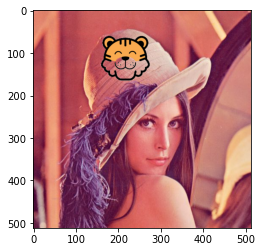

In [37]:
# 기존 original 이미지에 합성한 이미지 붙이기

img[50:rows+50, 150:cols+150] = bg_fg

plt.imshow(img)
plt.show()

In [ ]:
## 실습

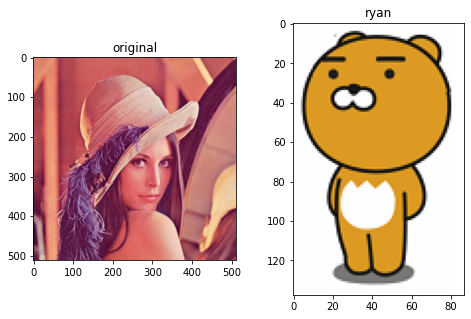

In [40]:
img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img2 = cv2.imread('./images/ryan.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('ryan')
plt.imshow(img2)

plt.show()


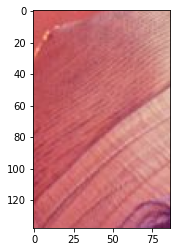

In [44]:
rows, cols, channal = img2.shape
roi = img[50:rows+50, 150:cols+150]
plt.imshow(roi)

In [47]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, mask_b = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)
mask_b_inv = cv2.bitwise_not(mask_b)

cv2.imshow('kk', img2gray)
cv2.imshow('bb', mask_b)
cv2.imshow('aa', mask_b_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

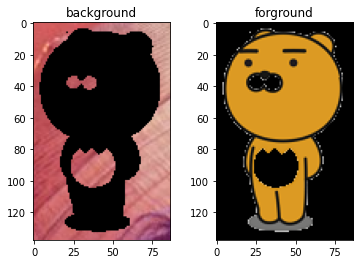

In [48]:
img_bg = cv2.bitwise_and(roi, roi, mask=mask_b)

img_fg = cv2.bitwise_and(img2, img2, mask=mask_b_inv)


plt.subplot(1,2,1)
plt.title('background')
plt.imshow(img_bg)

plt.subplot(1,2,2)
plt.title('forground')
plt.imshow(img_fg)
plt.show()

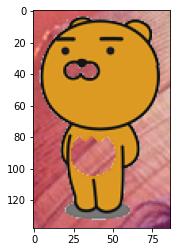

In [49]:
bg_fg = cv2.add(img_bg, img_fg)

plt.imshow(bg_fg)

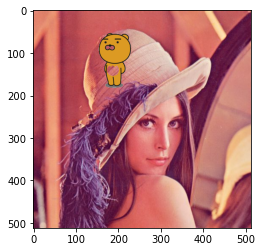

In [50]:
img[50:rows+50, 150:cols+150] = bg_fg

plt.imshow(img)
plt.show()